In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet,inconsistent
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
#Reading the data into a dataframe
carbigdf = pd.read_csv('https://raw.githubusercontent.com/shreyaschoudhary/Process-Data-Analytics/master/Carbig.csv')

In [3]:
carbigdf

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


In [4]:
carbigdf.isnull().any()

Acceleration    False
Cylinders       False
Displacement    False
Horsepower       True
MPG              True
Weight          False
dtype: bool

In [5]:
carbigdf['Horsepower'].isnull().sum()

6

In [6]:
carbigdf['MPG'].isnull().sum()

8

##Data Preprocessing

In [7]:
#Removing the rows containing NaN Values
carbigdf = carbigdf.dropna()
#Removing the cylinder values of 3 and 5
carbigdf = carbigdf[carbigdf.Cylinders != 3]
carbigdf = carbigdf[carbigdf.Cylinders != 5]

In [8]:
#Displaying the dataset after removing NaN values rows and 3,5 cylinder values row
carbigdf

,Acceleration,Cylinders,Displacement,Horsepower,MPG,Weight
0,12.0,8.0,307.0,130.0,18.0,3500.0
1,11.5,8.0,350.0,165.0,15.0,3690.0
2,11.0,8.0,318.0,150.0,18.0,3440.0
3,12.0,8.0,304.0,150.0,16.0,3430.0
4,10.5,8.0,302.0,140.0,17.0,3450.0
...,...,...,...,...,...,...
401,15.6,4.0,140.0,86.0,27.0,2790.0
402,24.6,4.0,97.0,52.0,44.0,2130.0
403,11.6,4.0,135.0,84.0,32.0,2300.0
404,18.6,4.0,120.0,79.0,28.0,2630.0


In [9]:
#Removing the cylinder column and completely disregarding it
carbig = carbigdf.drop(columns=['Cylinders'])
#Also, from the analysis done above, removing the acceleration and MPG column vector from consideration as feature (The feature selection is shown in the section below)
carbig = carbig.drop(columns=['Acceleration'])
carbig = carbig.drop(columns=['MPG'])
carbig

,Displacement,Horsepower,Weight
0,307.0,130.0,3500.0
1,350.0,165.0,3690.0
2,318.0,150.0,3440.0
3,304.0,150.0,3430.0
4,302.0,140.0,3450.0
...,...,...,...
401,140.0,86.0,2790.0
402,97.0,52.0,2130.0
403,135.0,84.0,2300.0
404,120.0,79.0,2630.0


##Exploratory Data Analysis and Feature Selection

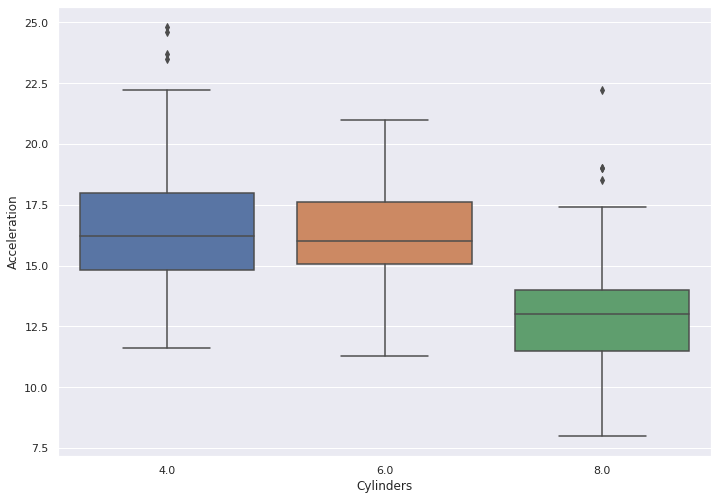

In [10]:
#Ploting the box plot for acceleration vector basing the classification on cylinder vector
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Cylinders", y="Acceleration", data=carbigdf)

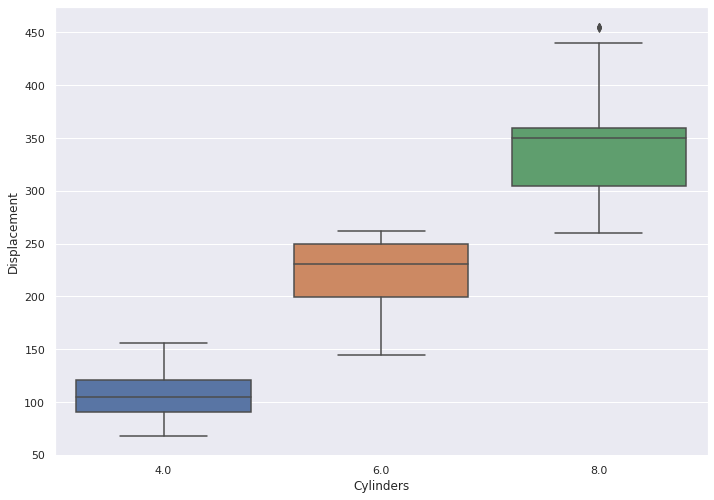

In [11]:
#Ploting the box plot for displacement vector basing the classification on cylinder vector
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Cylinders", y="Displacement", data=carbigdf)

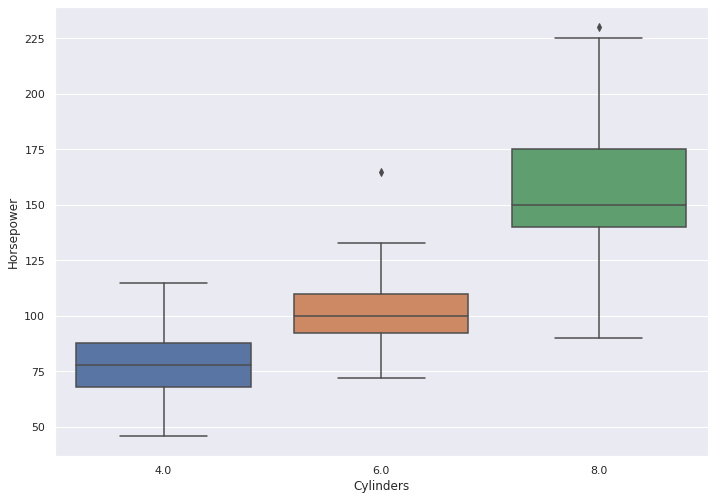

In [12]:
#Ploting the box plot for horsepower vector basing the classification on cylinder vector
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Cylinders", y="Horsepower", data=carbigdf)

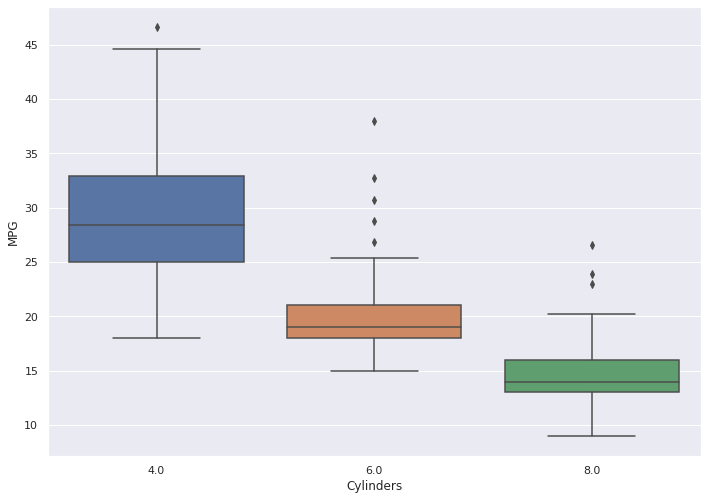

In [13]:
#Ploting the box plot for MPG vector basing the classification on cylinder vector
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Cylinders", y="MPG", data=carbigdf)

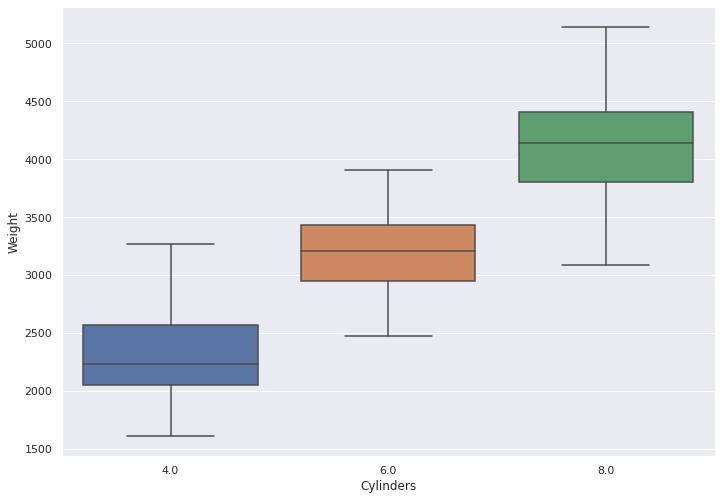

In [14]:
#Ploting the box plot for weight vector basing the classification on cylinder vector
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x="Cylinders", y="Weight", data=carbigdf)

We observe that there is a greater variability for the features of Displacement, Horsepower and Weight.
Also, since the notches in the boxplots do not overlap, we can clearly conclude that the true medians for these features do differ. This is also very evident from the scateerplot shown below.

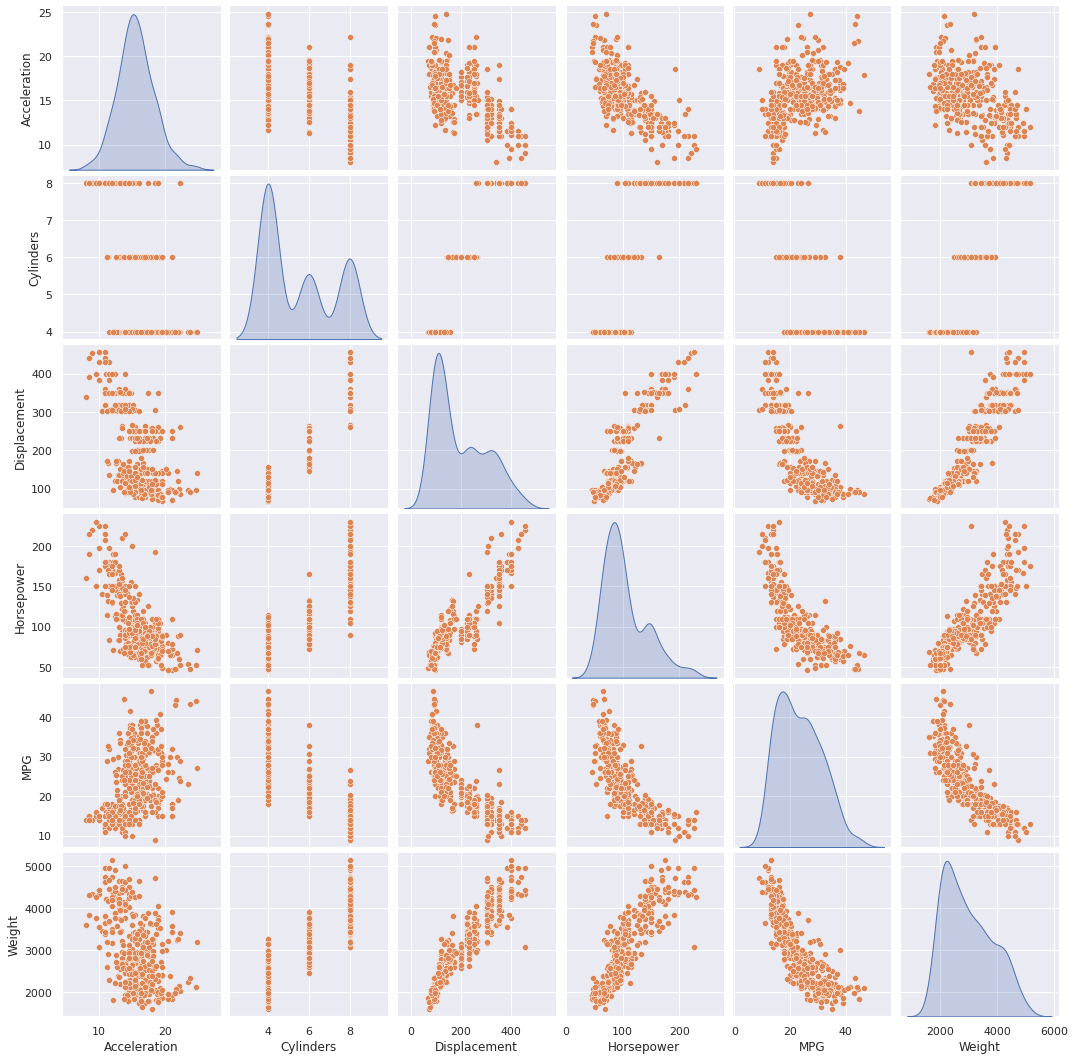

In [19]:
#Scatterplot for the original dataframe containing all columns. Gives the correlations among all the vectors/columns with other columns/vectors.
g = sns.pairplot(carbigdf.sample(n= 385, random_state=1),\
                 kind='scatter', diag_kind='kde') # point out imbalanced dataset and switch diag_kind from 'hist' to 'kde'
g.map_offdiag(sns.scatterplot)
g.add_legend()

###Displaying the features in the dataset

In [16]:
#Parallel Corrdinate plot on the original dataframe
fig = px.parallel_coordinates(carbigdf, color="Cylinders", labels={"4", "6" ,"8"},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)

fig.update_layout(
    title={
        'text': "Parallel Coordinate Plot",
        'y':1.0,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        })

fig.show()

####Displaying the 3D plots for the selected features

Due to greater variability for the features of Displacement, Horsepower and Weight, we can conclude that their medians do differ and they cover the data points in the dataset very well. Hence these features are chosen for further analysis. 3D plots of the chosen features has been given below.

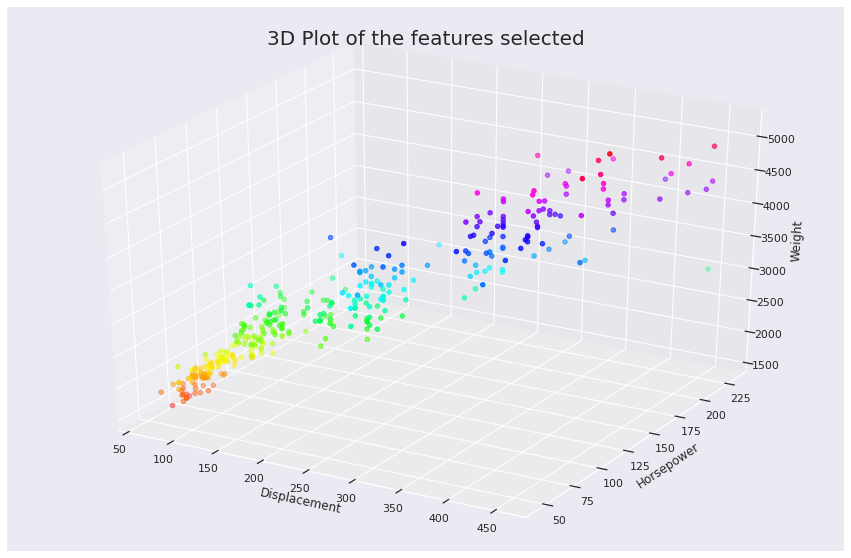

In [17]:
#Defining the axes for the 3D plot
x = carbig['Displacement']
y = carbig['Horsepower']
z = carbig['Weight']

#Plotting 3D plot
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z, c=z, cmap='hsv');
ax.set_xlabel("Displacement", fontsize=12)
ax.set_ylabel("Horsepower", fontsize=12)
ax.set_zlabel("Weight", fontsize=12)
ax.set_title("3D Plot of the features selected", fontsize=20)

plt.show()

#Clustering Implementation

###Hierarchical Clustering

In [20]:
#Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(carbig)
#Forming the dataframe of the standardized data
data_scaled1 = pd.DataFrame(data_scaled, columns=carbig.columns)
data_scaled1.head()

,Displacement,Horsepower,Weight
0,1.060686,0.653742,0.605214
1,1.471819,1.557988,0.828008
2,1.165860,1.170454,0.534858
3,1.032003,1.170454,0.523132
4,1.012880,0.912098,0.546584


In [21]:
# generate the linkage matrix for hierarchical clustering
Z = linkage(data_scaled, 'ward')

In [22]:
#Calculating the cophenetic distances and cophenetic correlation coefficient
c, coph_dists = cophenet(Z, pdist(data_scaled))
print("Cophenetic Correlation Coefficient is", c)
#Calculating the inconsistent matrix
i = inconsistent(Z)
print("Inconsistent Matrix is:", i)

Cophenetic Correlation Coefficient is 0.8232832271707009
Inconsistent Matrix is: [[ 0.          0.          1.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          1.          0.        ]
 ...
 [ 5.77853086  3.90781011  3.          1.13188182]
 [10.54142895  6.64540334  3.          1.02457995]
 [22.25913941 16.01584848  3.          1.11737999]]


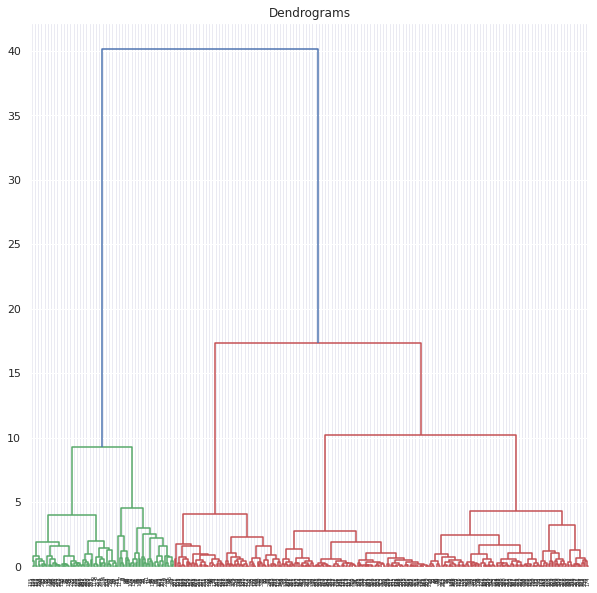

In [23]:
#Hierarchical clustering implementation
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

For determining certain number of clusters obtained from the hierarchical clustering analysis, we are looking out for high jump in distance, typically significant to be noticeable. In this case, visually the change is noticeable immediately after a distance measure of 10, so we can put ouur cutoff at a value of 15 on the distance axis.

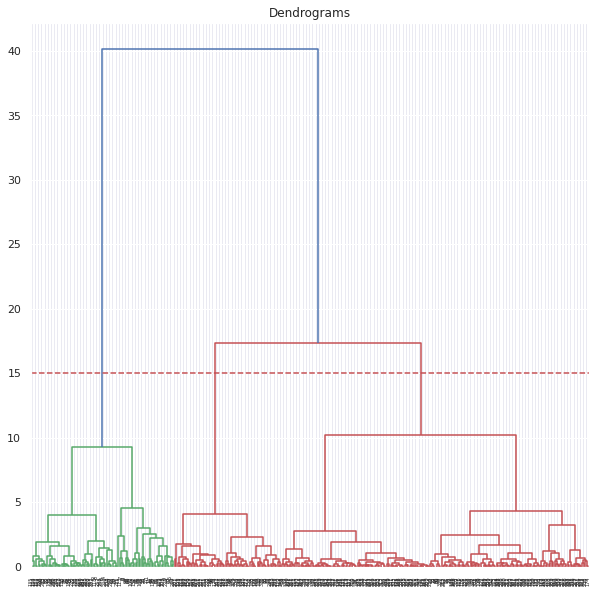

In [24]:
#Defining the threshold for the hierarchical clustering for determining the number of clusters from the analysis
plt.figure(figsize=(10, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

The threshold line touches the linkages at 3 diferent points , hence it is safe to say the data can be clustered into 3 distinct clusters.

Implementing the agglomerative clustering, clustering the whole data into 3 based on the number of clusters obtained from the analysis above

In [25]:
#Implementing the agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,

Text(0, 0.5, 'data scaled')

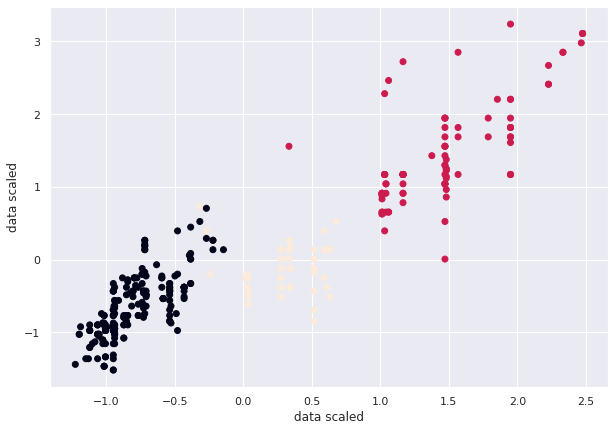

In [26]:
#Plotting the agglomerative clustering analysis done above
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=cluster.labels_) 
plt.xlabel("data scaled")
plt.ylabel("data scaled")

In [30]:
#Implementing the agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1,

Text(0, 0.5, 'data scaled')

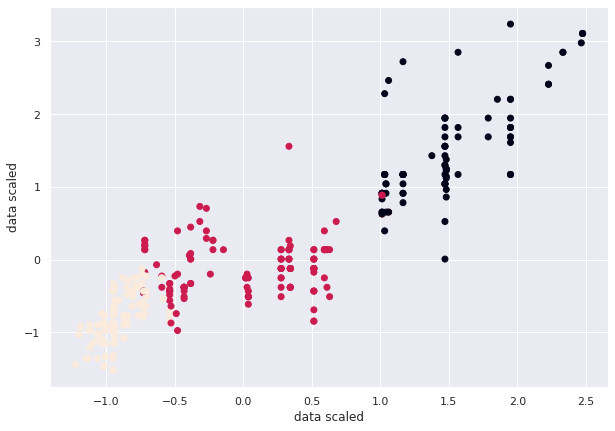

In [31]:
#Plotting the agglomerative clustering analysis done above
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=cluster.labels_) 
plt.xlabel("data scaled")
plt.ylabel("data scaled")

In [35]:
#Implementing the agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='cityblock', linkage='complete')  
cluster.fit_predict(data_scaled)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1,

Text(0, 0.5, 'data scaled')

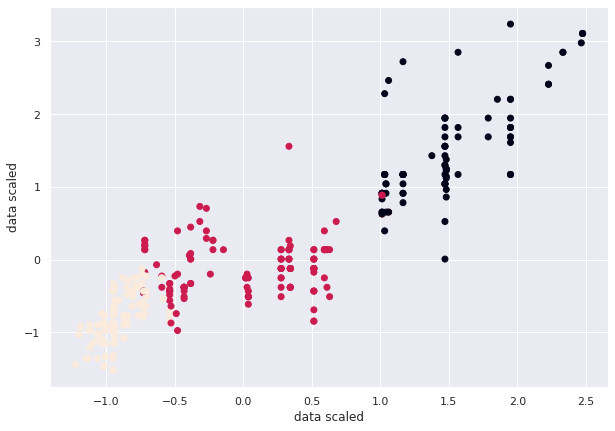

In [36]:
#Plotting the agglomerative clustering analysis done above
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=cluster.labels_) 
plt.xlabel("data scaled")
plt.ylabel("data scaled")

The analysis done above using different distance measures suggest that the linkage method of ward along with the distance metric of euclidean works best for the clustering.

We can see that the data has split into 3 different clusters. (PS- the third cluster  has very light shade of yellow)

###Silhouette Plots

Now, doing the silhouette score analysis for different metric measures so as to determine the best among them to use in the further analysis. Since the number of clusters obtained from the hierarchical clustering done above was 3, using the same here for determining the best distance metric.

In [38]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.522


In [39]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='cityblock')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.542


In [40]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='manhattan')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.542


In [41]:
# Instantiate the KMeans models
km = KMeans(n_clusters=3, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='hamming')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.035


Thus, we can conclude that 'cityblock' as well as 'manhattan' distance metric measure gives the best result among all, and so we will be using that.

Using the yellowbrick.cluster library for plotting silhouette plots.

Documentation - https://www.scikit-yb.org/en/latest/_modules/yellowbrick/cluster/silhouette.html

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



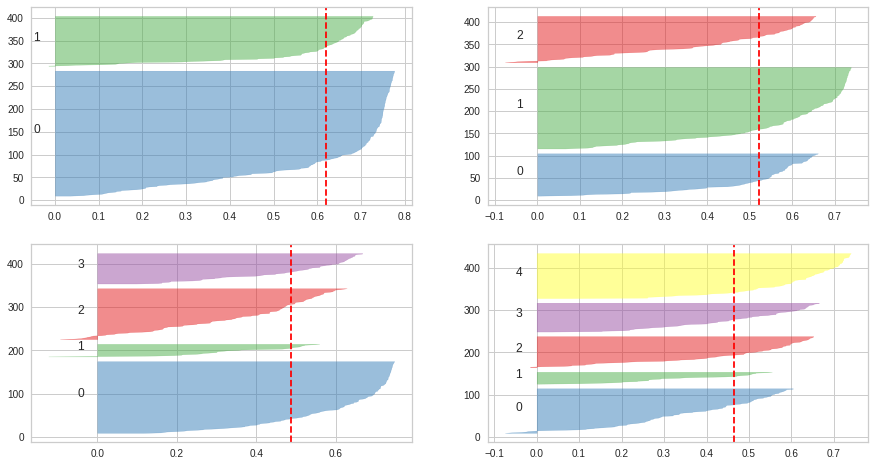

In [42]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

Silhouette Scores for the cluster 2,3,4,5 obtained above

In [44]:
#Silhouette Score for 2 clusters
km = KMeans(n_clusters=2, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='manhattan')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.642


In [45]:
#Silhouette Score for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='manhattan')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.542


In [46]:
#Silhouette Score for 4 clusters
km = KMeans(n_clusters=4, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='manhattan')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.505


In [47]:
#Silhouette Score for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
y = km.fit_predict(data_scaled)
score = silhouette_score(data_scaled, km.labels_, metric='manhattan')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.488


The values of 2 and 3 clusters looks to exhibit good cluster analysis as well as the silhouette scores. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For the plot with 3 clusters, the thickness is more comparitively uniform than the plot with 2 clusters with one cluster thickness much more than the other. Thus, we can approximately state that the optimal number of clusters as 3.

The consistency of the linkages can be said to be good as the linkage method 'ward' is being used. Ward resembles closely to k-means in terms if properties and efficiency. Also, ward is more accurate than k-means in uncovering the clusters of uneven variances or clusters thrown about space very irregularly.